{'p_levene': 0.03655549218337195,
 'p_welch':        Source  ddof1     ddof2          F     p-unc       np2
 0  Group_crit      3  48.87127  12.528097  0.000003  0.341943,
 'Games-Howell':            A          B      pval
 0  Burster_h  Burster_l  0.058284
 1  Burster_h         FS  0.008795
 2  Burster_h         RS  0.017781
 3  Burster_l         FS  0.001147
 4  Burster_l         RS  0.074499
 5         FS         RS  0.003760}

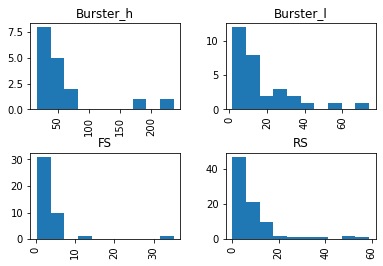

In [13]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
import pingouin as pg

path = 'C:/Users/Ping/Desktop/AC_type_project/'
os.chdir(path)

def group_comp (filename,grouptype,paramname):
    df = pd.read_csv(filename+'.csv')
    df = df.loc[df[paramname].notna(),:]
    #print(df.columns)
    summary = dict()
    
    switcher = {
        'crit': ['RS','FS','Burster_h','Burster_l'],
        'gmm' : ['RS','FS','Burster']
    }
    
    groupnames = switcher.get(grouptype)
    #print(groupnames)
    
    if groupnames==None:
        raise Exception('Group type must be \'crit\' or \'gmm\' ')
    
    key = 'Group_'+grouptype
    df = df.loc[df[key].isin(groupnames),:]
    #print(df['Group_'+grouptype].unique())    

    df[paramname].hist(by=df[key])
    
    # All Levene's tests seemed to reject the null for equality of variances 
    # Check for equality of variances again after log transform - in the end still reject null
    if ~np.any(df[paramname]==0):     # Cannot take log of zero
        df.loc[:,'log'+paramname] = np.log2(df[paramname])
        values_per_group = [col for col_name, col in df.groupby(key)['log'+paramname]]
        stat, p_levene = stats.levene(*values_per_group)
        summary['p_levene'] = p_levene
    else:
        p_levene = None     # e.g., log of zeros
    
    if (p_levene is None) or (p_levene < 0.05): 
        welch_df = pg.welch_anova(dv = paramname, between = key, data = df)
        #summary['p_welch'] = welch_df.get('p-unc')
        summary['p_welch'] = welch_df
        
        gh_df = pg.pairwise_gameshowell(dv = paramname, between = key, data = df)
        summary['Games-Howell'] = gh_df.loc[:,['A','B','pval']] 
    else:
        comp = mc.MultiComparison(df['log'+paramname],df[key])
        res = comp.tukeyhsd()
        temp = pd.DataFrame(data=res._results_table.data[1:], columns=res._results_table.data[0])
        summary['Tukey'] = temp.loc[:,['group1','group2','p-adj']]   
    
    return summary
    
summary = group_comp('CImax', 'crit', 'CI')
summary

# Checked Welch's ANOVA against MATLAB


{'p_levene': 0.001437344549876343,
 'p_welch':       Source  ddof1      ddof2          F         p-unc       np2
 0  Group_gmm      2  90.548258  22.516974  1.154575e-08  0.210745,
 'Games-Howell':          A   B   pval
 0  Burster  FS  0.001
 1  Burster  RS  0.001
 2       FS  RS  0.001}

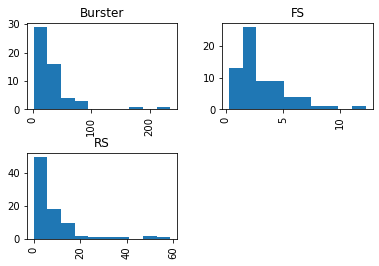

In [12]:
summary = group_comp('CImax', 'gmm', 'CI')
summary

{'p_welch':        Source  ddof1      ddof2         F     p-unc       np2
 0  Group_crit      3  79.908559  8.484508  0.000058  0.074422,
 'Games-Howell':            A          B      pval
 0  Burster_h  Burster_l  0.477822
 1  Burster_h         FS  0.001000
 2  Burster_h         RS  0.009811
 3  Burster_l         FS  0.003740
 4  Burster_l         RS  0.101964
 5         FS         RS  0.367406}

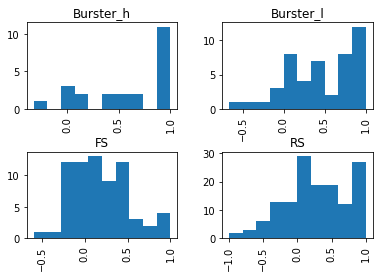

In [9]:
summary = group_comp('adaptindex','crit','Adaptindex')
summary

{'p_welch':        Source  ddof1      ddof2          F     p-unc       np2
 0  Group_crit      3  44.431364  12.911078  0.000003  0.160633,
 'Games-Howell':            A          B      pval
 0  Burster_h  Burster_l  0.047508
 1  Burster_h         FS  0.001000
 2  Burster_h         RS  0.001000
 3  Burster_l         FS  0.060044
 4  Burster_l         RS  0.219585
 5         FS         RS  0.747629}

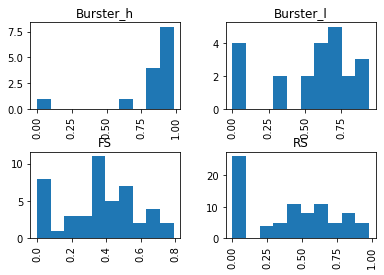

In [8]:
summary = group_comp('maxVS','crit','maxVS')
summary

{'p_levene': 0.020829102552823678,
 'p_welch':        Source  ddof1      ddof2         F     p-unc       np2
 0  Group_crit      3  31.736907  8.207693  0.000348  0.177756,
 'Games-Howell':            A          B      pval
 0  Burster_h  Burster_l  0.027740
 1  Burster_h         FS  0.606516
 2  Burster_h         RS  0.007966
 3  Burster_l         FS  0.183005
 4  Burster_l         RS  0.587021
 5         FS         RS  0.021445}

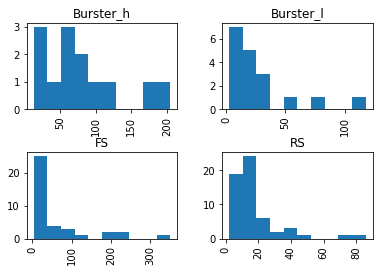

In [7]:
summary = group_comp('maxsync','crit','msf')
summary

{'p_welch':       Source  ddof1      ddof2          F     p-unc       np2
 0  Group_gmm      2  96.532314  15.558761  0.000001  0.156819,
 'Games-Howell':          A   B   pval
 0  Burster  FS  0.001
 1  Burster  RS  0.001
 2       FS  RS  0.900}

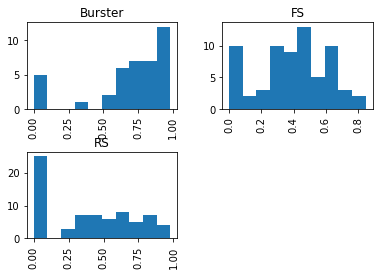

In [10]:
summary = group_comp('maxVS','gmm','maxVS')
summary

{'p_levene': 0.035760432398969914,
 'p_welch':       Source  ddof1      ddof2         F     p-unc       np2
 0  Group_gmm      2  82.350782  4.322875  0.016397  0.045522,
 'Games-Howell':          A   B      pval
 0  Burster  FS  0.750670
 1  Burster  RS  0.090760
 2       FS  RS  0.035569}

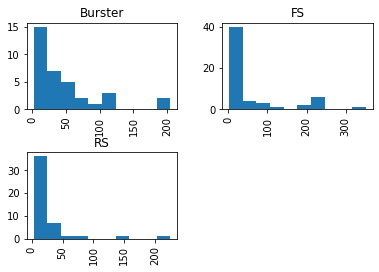

In [11]:
summary = group_comp('maxsync','gmm','msf')
summary